Importing libraries and loading data files.

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
us_data = pd.read_csv(r'C:\Users\winra\OneDrive\Documents\GitHub\EECS-731-Project-1-Jimmy-Wrangler-Data-Explorer\data\external\datasets_us.csv')
global_data = pd.read_csv(r'C:\Users\winra\OneDrive\Documents\GitHub\EECS-731-Project-1-Jimmy-Wrangler-Data-Explorer\data\external\datasets_global.csv')
us_data

,Date,US_Cases,US_Deaths
0,01-21-20,1,0
1,01-22-20,1,0
2,01-23-20,1,0
3,01-24-20,2,0
4,01-25-20,3,0
...,...,...,...
216,08-24-20,5754178,177198
217,08-25-20,5793346,178411
218,08-26-20,5838125,179604
219,08-27-20,5883729,180731


Joining tables on the basis of date

Joining tables on the basis of date

In [15]:
all_data = pd.merge(global_data,us_data, on=["Date"])
all_data

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,US_Cases,US_Deaths
0,01-22-20,555,17,28,510,0,0,0,3.06,5.05,60.71,6,1,0
1,01-23-20,654,18,30,606,99,1,2,2.75,4.59,60.00,8,1,0
2,01-24-20,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2,0
3,01-25-20,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,3,0
4,01-26-20,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,07-23-20,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,4049889,144282
184,07-24-20,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,4123413,145429
185,07-25-20,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,4190189,146312
186,07-26-20,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,4244406,146752


Taking percentage of cases and deaths in US from the world

In [20]:

all_data['US cases %'] = all_data['US_Cases']/(all_data['Confirmed'])*100
all_data['US Deaths %'] = all_data['US_Deaths']/(all_data['Deaths'])*100
all_data.round(2)


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,US_Cases,US_Deaths,US cases %,US Deaths %
0,01-22-20,555,17,28,510,0,0,0,3.06,5.05,60.71,6,1,0,0.18,0.00
1,01-23-20,654,18,30,606,99,1,2,2.75,4.59,60.00,8,1,0,0.15,0.00
2,01-24-20,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2,0,0.21,0.00
3,01-25-20,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,3,0,0.21,0.00
4,01-26-20,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,5,0,0.24,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,07-23-20,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,4049889,144282,26.11,22.78
184,07-24-20,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,4123413,145429,26.11,22.74
185,07-25-20,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,4190189,146312,26.11,22.70
186,07-26-20,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,4244406,146752,26.12,22.63


Saving the resulting data to CSV file.

In [21]:
all_data.to_csv(r"C:\Users\winra\OneDrive\Documents\GitHub\EECS-731-Project-1-Jimmy-Wrangler-Data-Explorer\data\processed\Result.csv",index=False) 

Plotting the percentage graph.

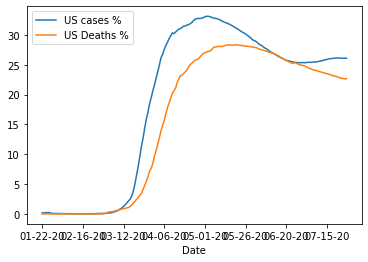

In [22]:
result_fig = all_data.plot(x ='Date', y= ['US cases %','US Deaths %'], kind = 'line')
result_fig.get_figure().savefig(r"C:\Users\winra\OneDrive\Documents\GitHub\EECS-731-Project-1-Jimmy-Wrangler-Data-Explorer\reports\figures\Cases percentage report.pdf")